In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
df=pd.read_csv("data\seeds.csv")
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [4]:
# target (three different varieties of wheat): Kama (1), Rosa (2) and Canadian (3)
df.columns=['area','perimeter','compactness','length_kernel','width_kernel','asymmetry_coeff','length_of_kernel_groove','target']

In [19]:
df.tail()

,area,perimeter,compactness,length_kernel,width_kernel,asymmetry_coeff,length_of_kernel_groove,target
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3
209,12.30,13.34,0.8684,5.243,2.974,5.637,5.063,3


In [6]:
df.isnull().sum()

area                       0
perimeter                  0
compactness                0
length_kernel              0
width_kernel               0
asymmetry_coeff            0
length_of_kernel_groove    0
target                     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   area                     210 non-null    float64
 1   perimeter                210 non-null    float64
 2   compactness              210 non-null    float64
 3   length_kernel            210 non-null    float64
 4   width_kernel             210 non-null    float64
 5   asymmetry_coeff          210 non-null    float64
 6   length_of_kernel_groove  210 non-null    float64
 7   target                   210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [8]:
df.describe()

,area,perimeter,compactness,length_kernel,width_kernel,asymmetry_coeff,length_of_kernel_groove,target
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


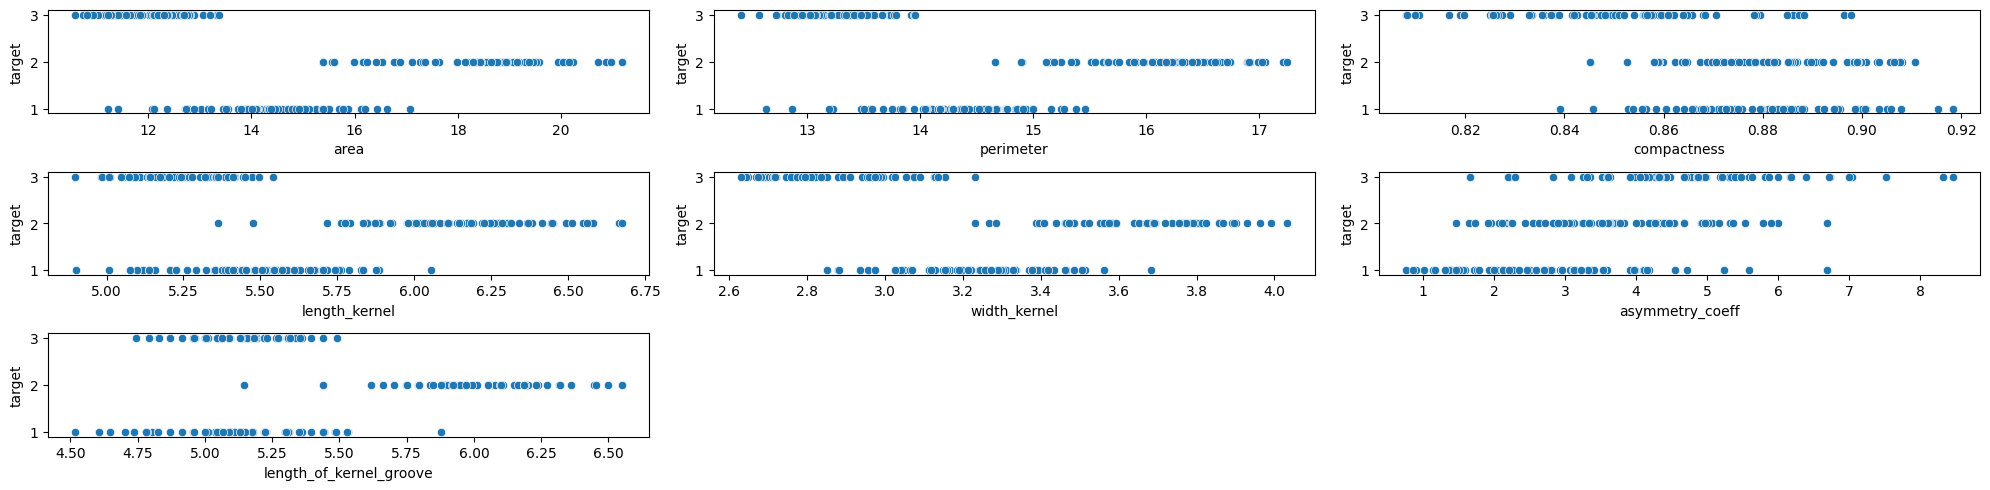

In [9]:
columns=['area','perimeter','compactness','length_kernel','width_kernel','asymmetry_coeff','length_of_kernel_groove']
plt.figure(figsize=(20,5))
for i in range(0, len(columns)):
    plt.subplot(3,3,i+1)
    sns.scatterplot(data=df, x = df[columns[i]], y = 'target')
    plt.tight_layout()


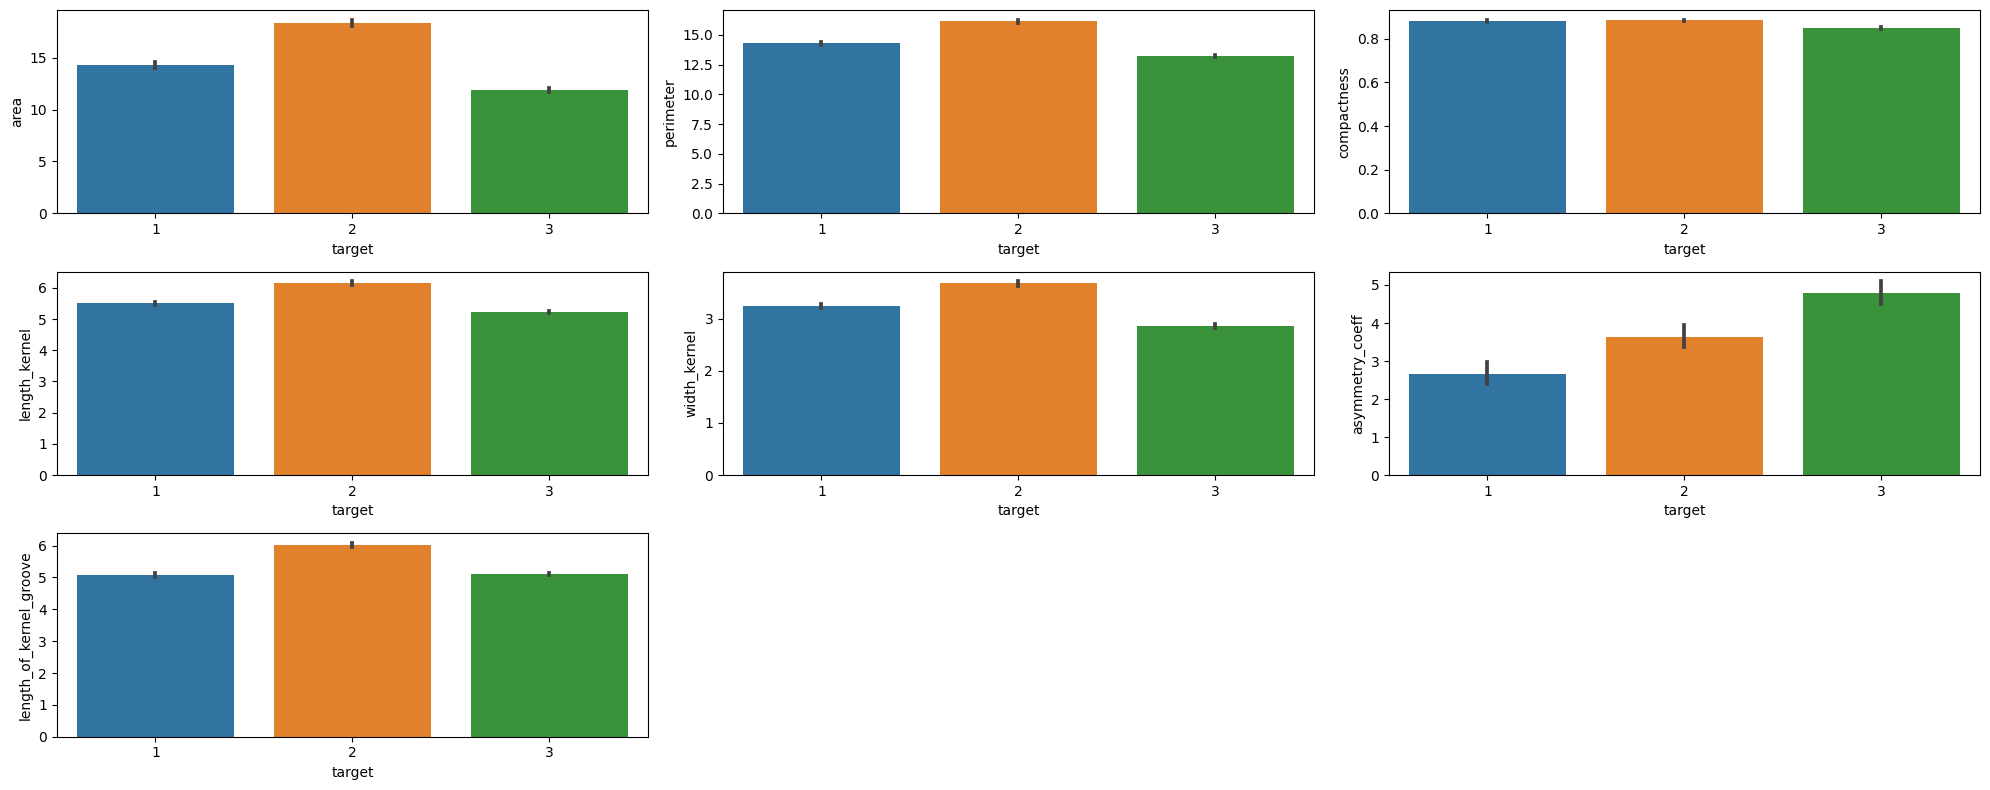

In [10]:
columns=['area','perimeter','compactness','length_kernel','width_kernel','asymmetry_coeff','length_of_kernel_groove']
plt.figure(figsize=(20,8))
for i in range(0, len(columns)):
    plt.subplot(3,3,i+1)
    sns.barplot(data=df, y = df[columns[i]], x = 'target')
    plt.tight_layout()


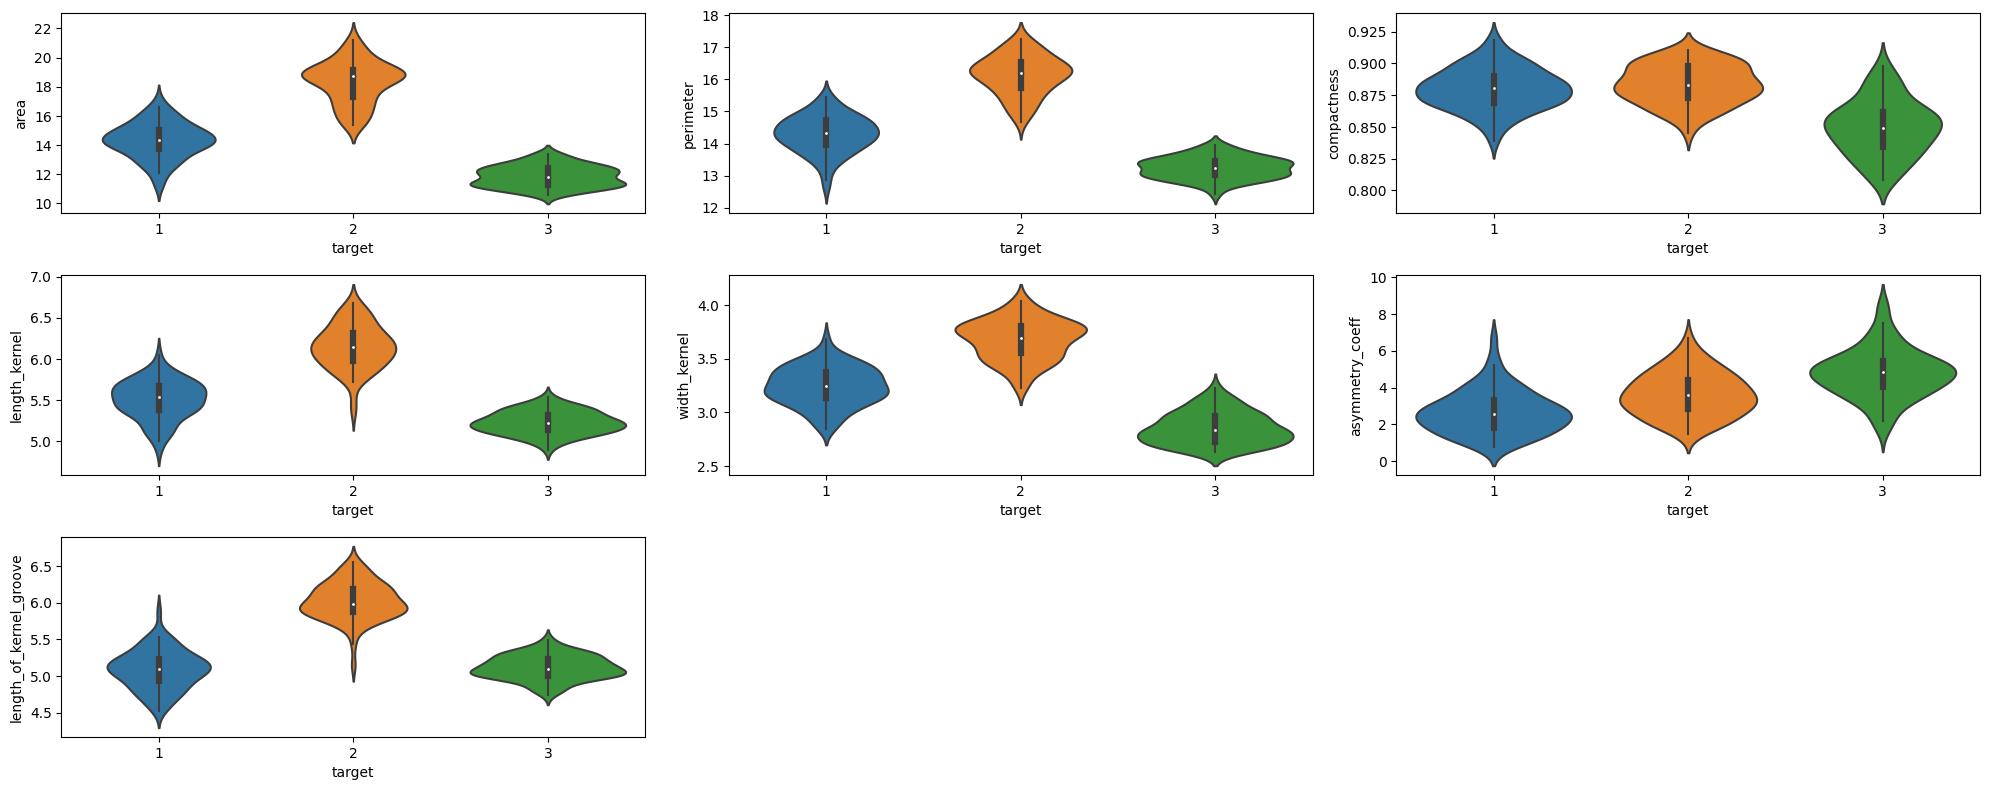

In [11]:
columns=['area','perimeter','compactness','length_kernel','width_kernel','asymmetry_coeff','length_of_kernel_groove']
plt.figure(figsize=(20,8))
for i in range(0, len(columns)):
    plt.subplot(3,3,i+1)
    sns.violinplot(data=df, y = df[columns[i]], x = 'target')
    plt.tight_layout()


<Axes: >

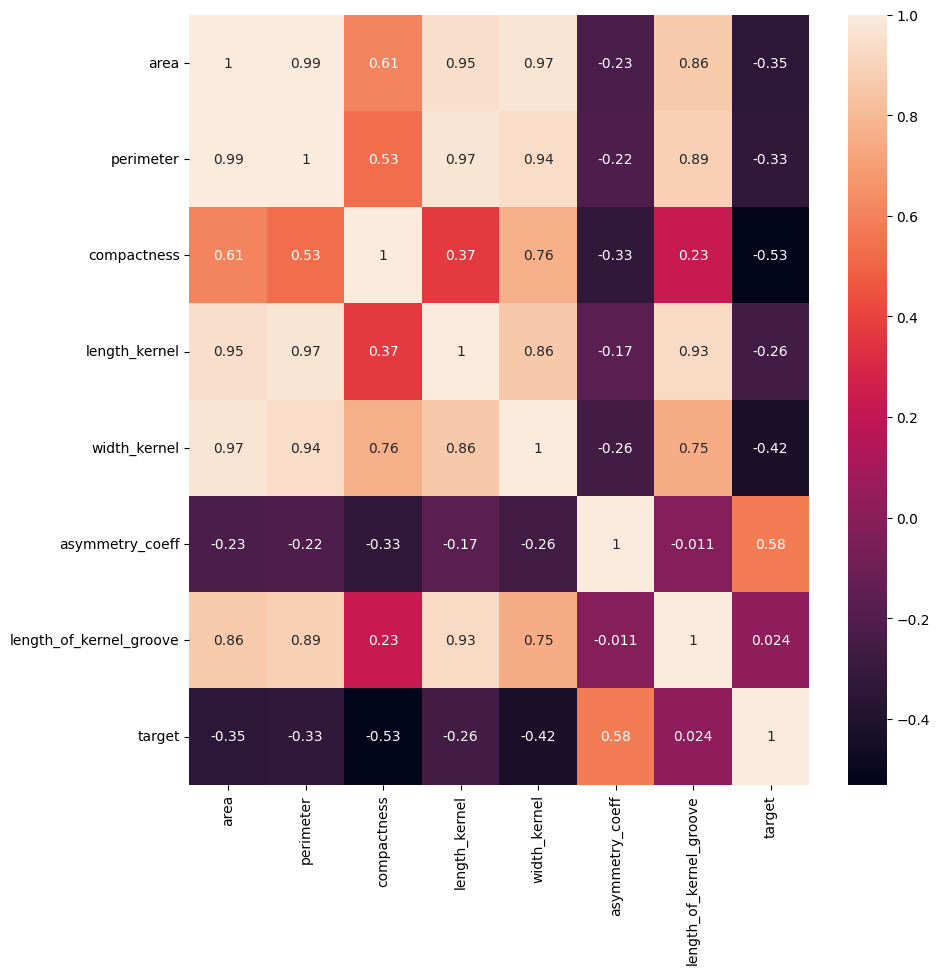

In [12]:
# corelation 
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

<Figure size 2000x2000 with 0 Axes>

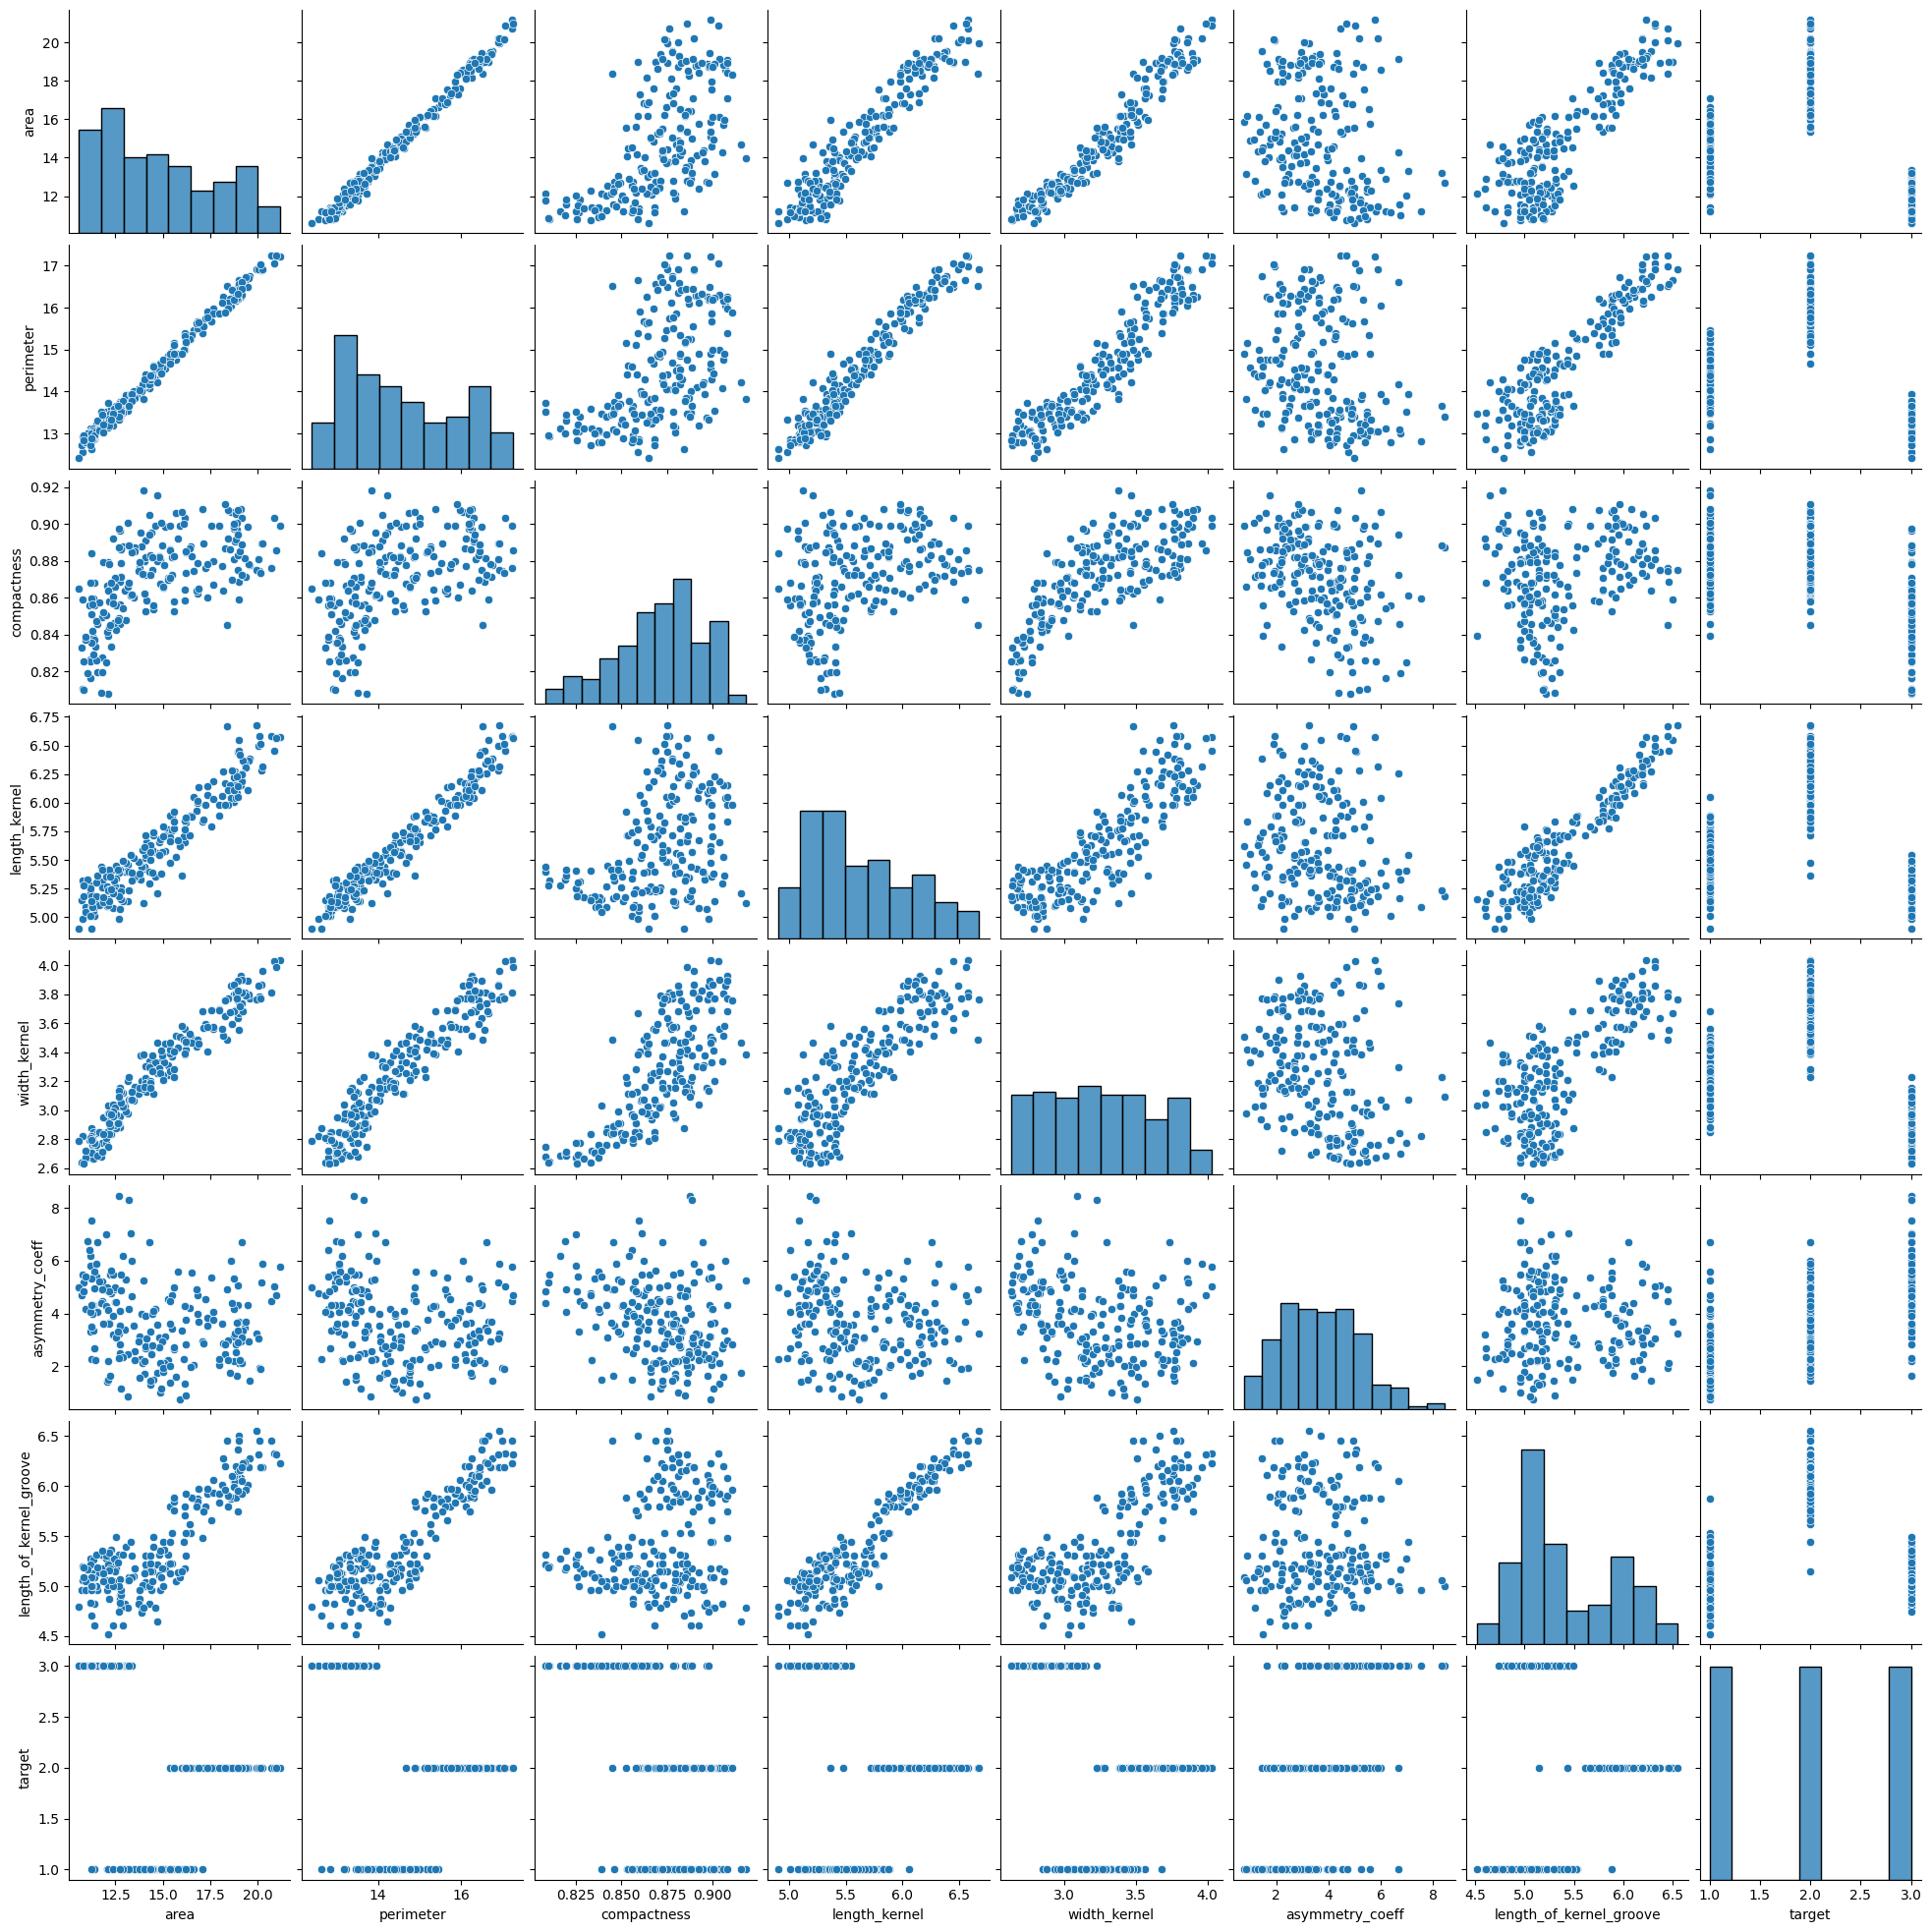

In [13]:
##correlation
plt.figure(figsize=(20,20))
sns.pairplot(df)

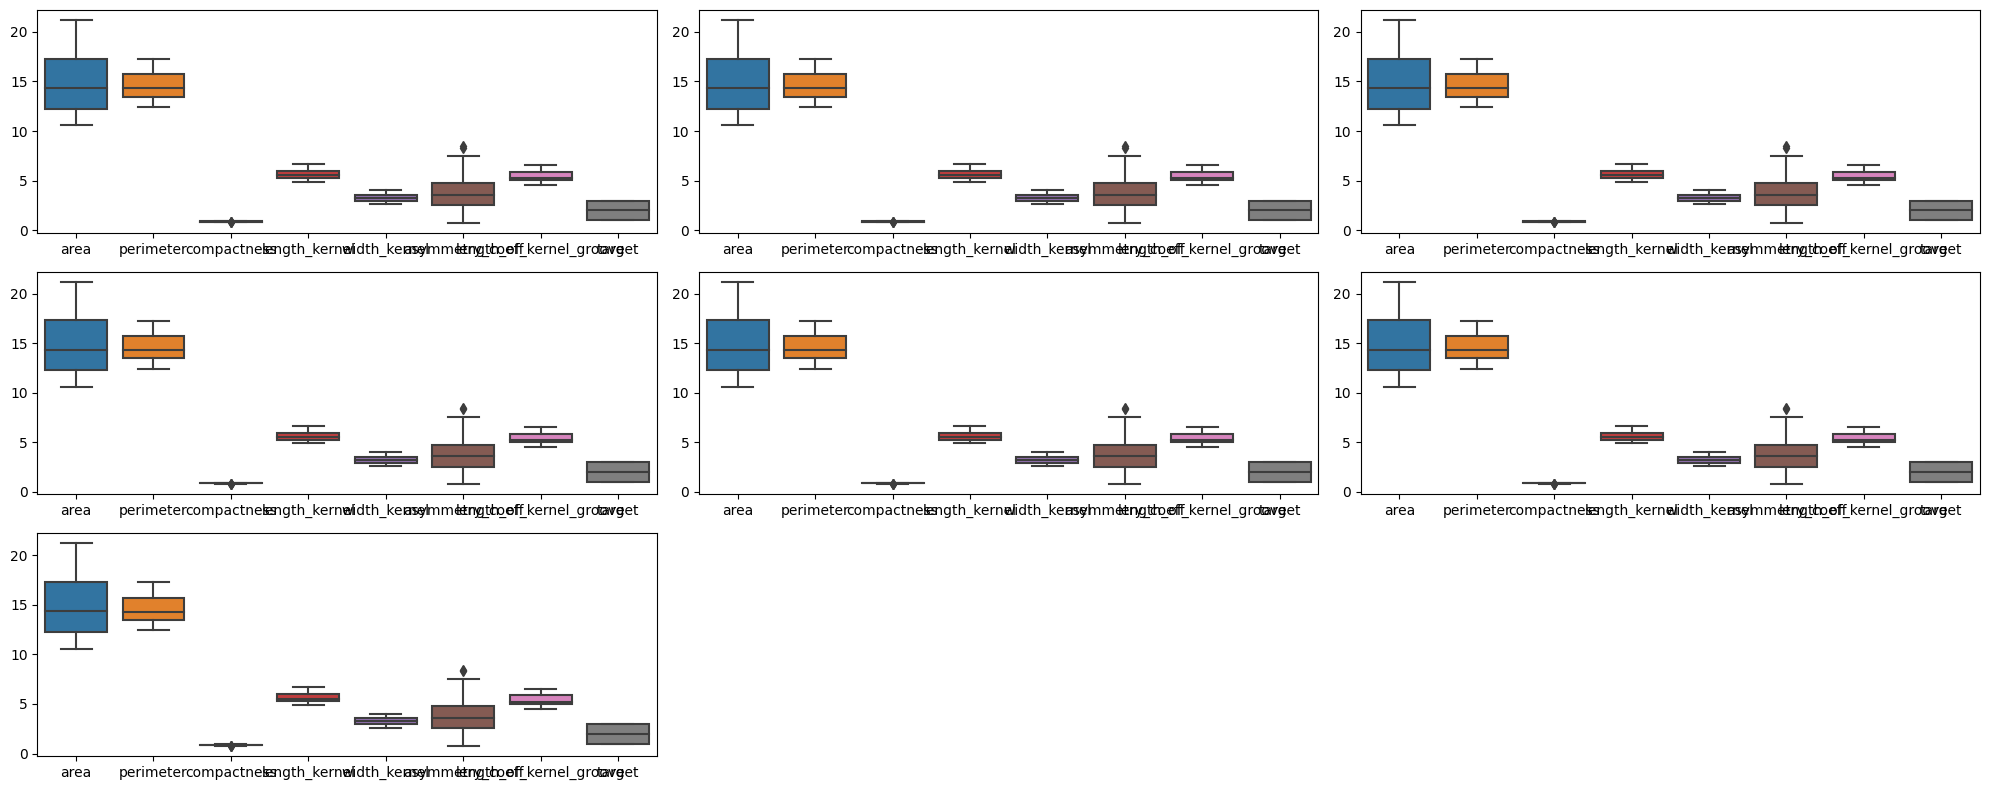

In [14]:
columns=['area','perimeter','compactness','length_kernel','width_kernel','asymmetry_coeff','length_of_kernel_groove']
plt.figure(figsize=(20,8))
for i in range(0, len(columns)):
    plt.subplot(3,3,i+1)
    sns.boxplot(df)#data=df, y = df[columns[i]], x = 'target')
    plt.tight_layout()


In [15]:
df_preprocessed = df

# Remove outliers
Q1 = df_preprocessed.quantile(0.25)
Q3 = df_preprocessed.quantile(0.75)
IQR = Q3 - Q1

print('Before outlier removal: ', df_preprocessed.shape)
df_preprocessed = df_preprocessed[~((df_preprocessed < (Q1 - 1.5 * IQR)) |(df_preprocessed > (Q3 + 1.5 * IQR))).any(axis=1)]
print('After outlier removal: ', df_preprocessed.shape)

Before outlier removal:  (210, 8)
After outlier removal:  (205, 8)


In [16]:
df.duplicated().sum()

0

In [17]:
df['target'].value_counts()

target
1    70
2    70
3    70
Name: count, dtype: int64